In [ ]:
import sys, os
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

# Use below for charts in dark jupyter theme

THEME_DARK = False

if THEME_DARK:
    # This is used if Jupyter Theme dark is enabled. 
    # The theme chosen can be activated with jupyter theme as follows:
    # >>> jt -t oceans16 -T -nfs 115 -cellw 98% -N  -kl -ofs 11 -altmd
    font_size = '20.0'
    dark_theme_config = {
        "ytick.color" : "w",
        "xtick.color" : "w",
        "text.color": "white",
        'font.size': font_size,
        'axes.titlesize': font_size,
        'axes.labelsize': font_size, 
        'xtick.labelsize': font_size, 
        'ytick.labelsize': font_size, 
        'legend.fontsize': font_size, 
        'figure.titlesize': font_size,
        'figure.figsize': [20, 7],
        'figure.facecolor': "#384151",
        'legend.facecolor': "#384151",
        "axes.labelcolor" : "w",
        "axes.edgecolor" : "w"
    }
    plt.rcParams.update(dark_theme_config)

sys.path.append("..")

import xai
import xai.data

ModuleNotFoundError: ignored

In [ ]:
pip install xai


  Using cached https://files.pythonhosted.org/packages/67/a7/12261a51ac2e7be4c698ca27cbe364ca5f16d64999456ee47ea8c7b44417/pandas-0.23.4-cp37-cp37m-manylinux1_x86_64.whl
ERROR: xarray 0.18.0 has requirement numpy>=1.17, but you'll have numpy 1.15.4 which is incompatible.
ERROR: xarray 0.18.0 has requirement pandas>=1.0, but you'll have pandas 0.23.4 which is incompatible.
ERROR: pymc3 3.11.2 has requirement pandas>=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
ERROR: pymc3 3.11.2 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.2 which is incompatible.
ERROR: plotnine 0.6.0 has requirement numpy>=1.16.0, but you'll have numpy 1.15.4 which is incompatible.
ERROR: plotnine 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.23.4 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incomp

In [ ]:
csv_path = './Toddler_Autism-Copy.csv'
categorical_cols = ["Sex", "Ethnicity", "Who_completed_the_test", "Jaundice",
                   "Family_mem_with_ASD", "res"]
csv_columns = ["Case_No", "A1", "A2", "A3", "A4", "A5",
                   "A6", "A7", "A8", "A9", "A10","Age_Mons","Qchat-10-Score","Sex", "Ethnicity", "Who_completed_the_test", "Jaundice",
                   "Family_mem_with_ASD", "res"]
            

In [ ]:
pip install --upgrade pandas==0.24.2

     |████████████████████████████████| 10.1MB 5.9MB/s 
ERROR: xarray 0.18.0 has requirement numpy>=1.17, but you'll have numpy 1.15.4 which is incompatible.
ERROR: xarray 0.18.0 has requirement pandas>=1.0, but you'll have pandas 0.24.2 which is incompatible.
ERROR: xai 0.0.5 has requirement pandas==0.23.4, but you'll have pandas 0.24.2 which is incompatible.
ERROR: pymc3 3.11.2 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.2 which is incompatible.
ERROR: plotnine 0.6.0 has requirement numpy>=1.16.0, but you'll have numpy 1.15.4 which is incompatible.
ERROR: plotnine 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.24.2 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.2 which is incompatibl

In [ ]:
df = pd.read_csv('./Toddler_Autism-Copy.csv')
df.head()

In [ ]:
target = "res"
protected = ["Ethnicity", "Sex", "Age_Mons"]

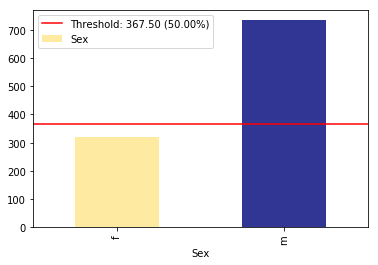

In [ ]:
df_groups = xai.imbalance_plot(df, "Sex", categorical_cols=categorical_cols)

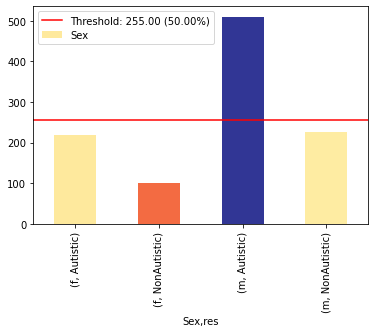

In [ ]:
groups = xai.imbalance_plot(df, "Sex", "res", categorical_cols=categorical_cols)

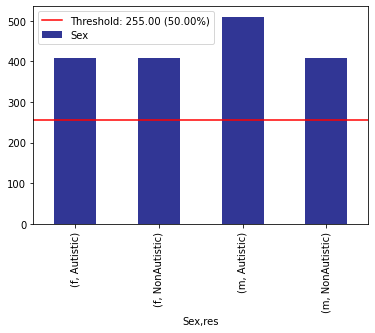

In [ ]:
bal_df = xai.balance(df, "Sex", "res", upsample=0.8, categorical_cols=categorical_cols)

In [ ]:
groups = xai.group_by_columns(df, ["Sex", "res"], categorical_cols=categorical_cols)
for group, group_df in groups:
    print(group)
    print(group_df["res"].head(), "\n")

('f', 'Autistic')
0     Autistic
4     Autistic
12    Autistic
18    Autistic
19    Autistic
Name: res, dtype: object 

('f', 'NonAutistic')
13    NonAutistic
17    NonAutistic
30    NonAutistic
31    NonAutistic
32    NonAutistic
Name: res, dtype: object 

('m', 'Autistic')
1    Autistic
2    Autistic
3    Autistic
5    Autistic
6    Autistic
Name: res, dtype: object 

('m', 'NonAutistic')
7     NonAutistic
11    NonAutistic
15    NonAutistic
24    NonAutistic
28    NonAutistic
Name: res, dtype: object 



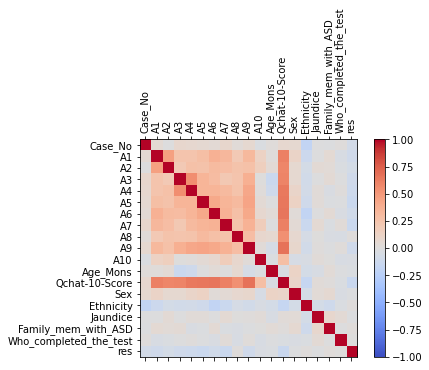

In [ ]:
_ = xai.correlations(df, include_categorical=True, plot_type="matrix")

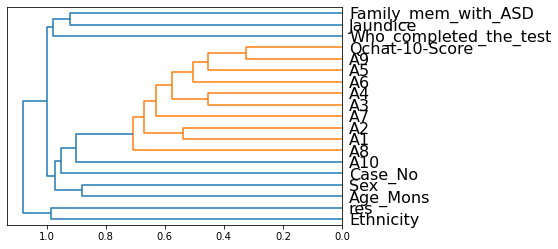

In [ ]:

_ = xai.correlations(df, include_categorical=True)

Total number of examples:  80


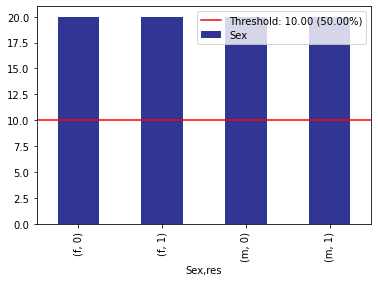

In [ ]:
proc_df = xai.normalize_numeric(bal_df)
proc_df = xai.convert_categories(proc_df)
x = proc_df.drop("res", axis=1)
y = proc_df["res"]

x_train, y_train, x_test, y_test, train_idx, test_idx = \
    xai.balanced_train_test_split(
            x, y, "Sex", 
            min_per_group=20,
            max_per_group=20,
            categorical_cols=categorical_cols)

x_train_display = bal_df[train_idx]
x_test_display = bal_df[test_idx]

print("Total number of examples: ", x_test.shape[0])

df_test = x_test_display.copy()
df_test["res"] = y_test

_= xai.imbalance_plot(df_test, "Sex", "res", categorical_cols=categorical_cols)

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error, roc_curve, auc

from keras.layers import Input, Dense, Flatten, \
    Concatenate, concatenate, Dropout, Lambda
from keras.models import Model, Sequential
from keras.layers.embeddings import Embedding

def build_model(X):
    input_els = []
    encoded_els = []
    dtypes = list(zip(X.dtypes.index, map(str, X.dtypes)))
    for k,dtype in dtypes:
        input_els.append(Input(shape=(1,)))
        if dtype == "int8":
            e = Flatten()(Embedding(X[k].max()+1, 1)(input_els[-1]))
        else:
            e = input_els[-1]
        encoded_els.append(e)
    encoded_els = concatenate(encoded_els)

    layer1 = Dropout(0.4)(Dense(600, activation="relu")(encoded_els))
    out = Dense(1, activation='sigmoid')(layer1)

    # train model
    model = Model(inputs=input_els, outputs=[out])
    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
    return model


def f_in(X, m=None):
    """Preprocess input so it can be provided to a function"""
    if m:
        return [X.iloc[:m,i] for i in range(X.shape[1])]
    else:
        return [X.iloc[:,i] for i in range(X.shape[1])]

def f_out(probs, threshold=0.4):
    """Convert probabilities into classes"""
    return list((probs >= threshold).astype(int).T[0])

In [ ]:
model = build_model(x_train)
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=300
)

#model.fit(f_in(x_train), y_train, epochs=100, batch_size=50)

In [ ]:
score = model.evaluate(f_in(x_test), y_test, verbose=1)
print("Error %.4f: " % score[0])
print("Accuracy %.4f: " % (score[1]*100))

3/3 [==============================] - 0s 3ms/step - loss: 0.4040 - accuracy: 0.8250
Error 0.4040: 
Accuracy 82.5000: 


In [ ]:
probabilities = model.predict(f_in(x_test))
pred = f_out(probabilities)

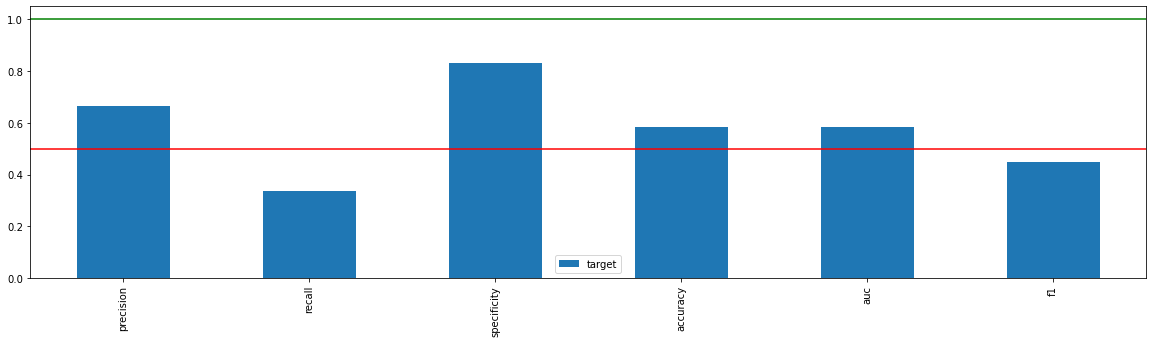

In [ ]:
_= xai.metrics_plot(
        y_test, 
        probabilities)

In [ ]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,res
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,Autistic
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Autistic
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Autistic
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Autistic
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Autistic


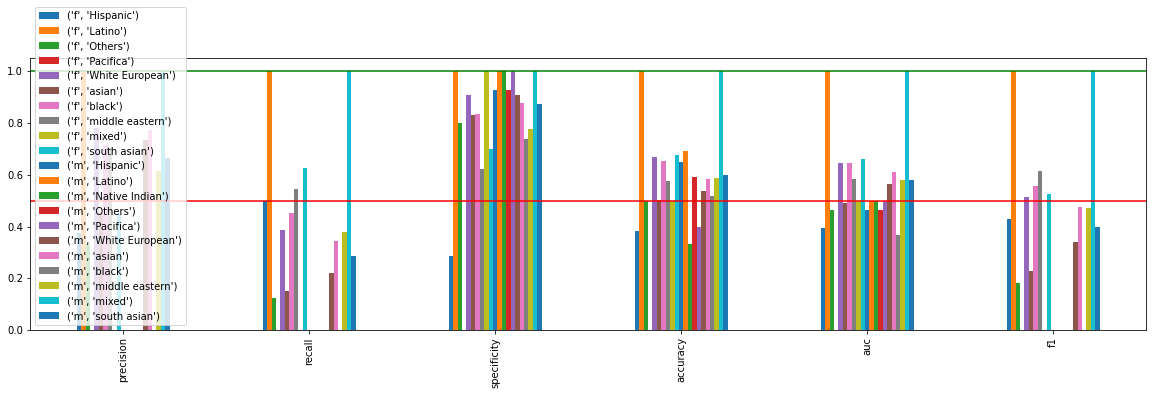

In [ ]:
_ = xai.metrics_plot(
    y_test, 
    probabilities, 
    df=x_test_display, 
    cross_cols=["Sex", "Ethnicity"],
    categorical_cols=categorical_cols)

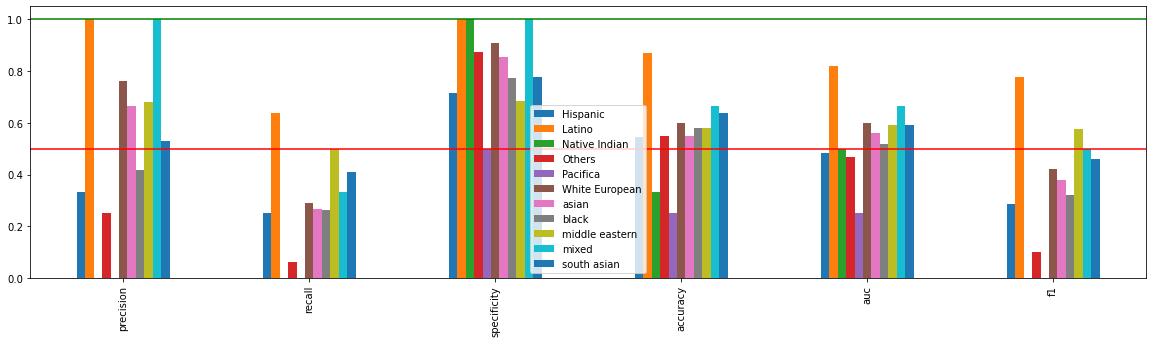

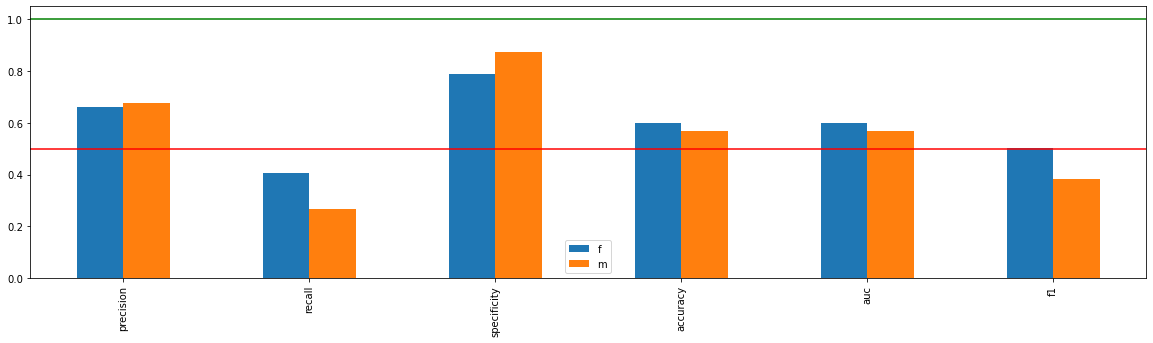

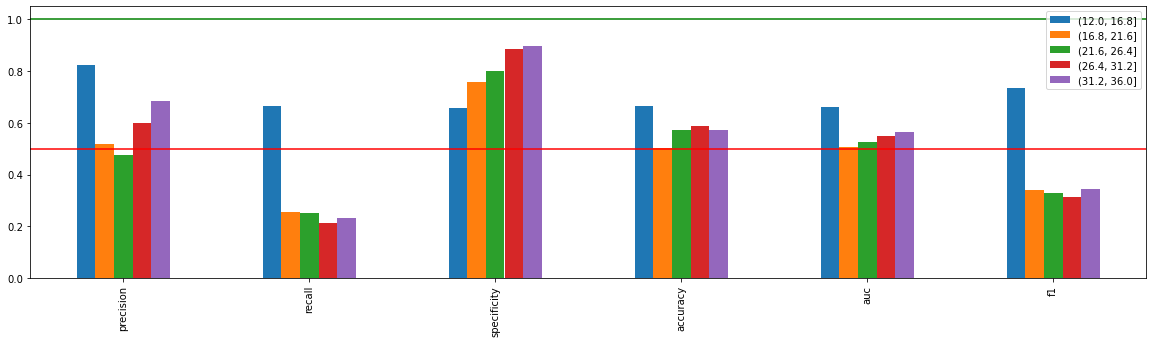

In [ ]:
_ = [xai.metrics_plot(
    y_test, 
    probabilities, 
    df=x_test_display, 
    cross_cols=[p],
    categorical_cols=categorical_cols) for p in protected]

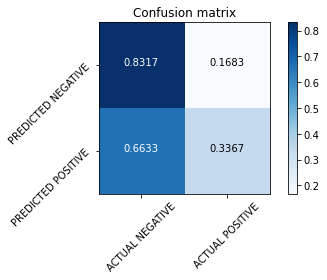

In [ ]:
xai.confusion_matrix_plot(y_test, pred)

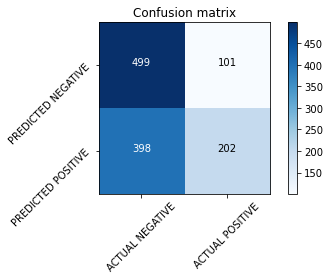

In [ ]:
xai.confusion_matrix_plot(y_test, pred, scaled=False)

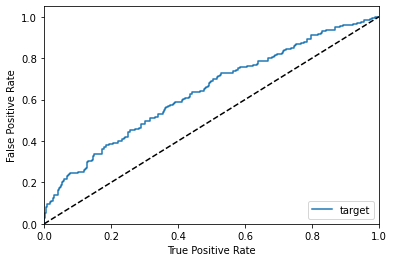

In [ ]:
_ = xai.roc_plot(y_test, probabilities)

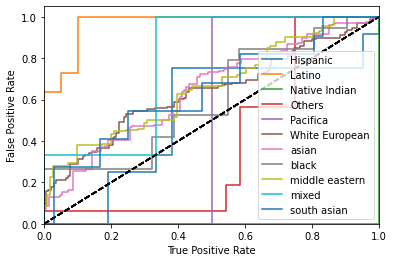

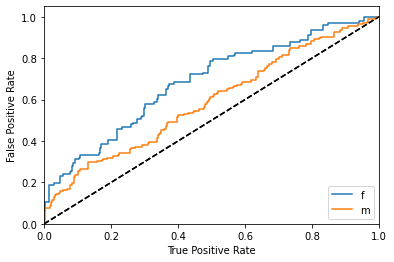

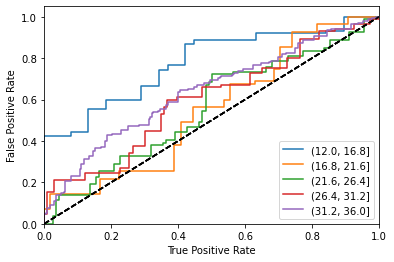

In [ ]:
_ = [xai.roc_plot(
    y_test, 
    probabilities, 
    df=x_test_display, 
    cross_cols=[p],
    categorical_cols=categorical_cols) for p in protected]

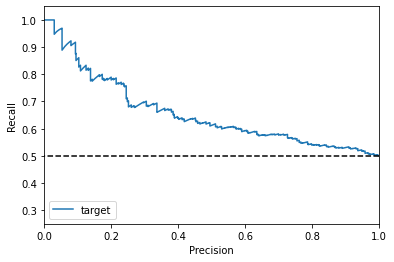

In [ ]:
_= xai.pr_plot(y_test, probabilities)

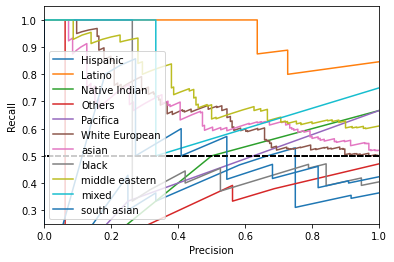

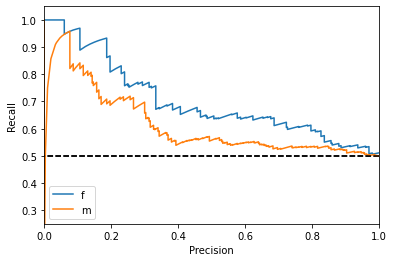

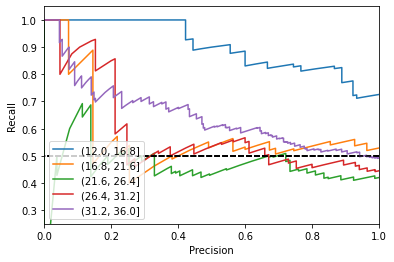

In [ ]:
_ = [xai.pr_plot(
    y_test, 
    probabilities, 
    df=x_test_display, 
    cross_cols=[p],
    categorical_cols=categorical_cols) for p in protected]

C:\Users\kawsh\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\kawsh\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\kawsh\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

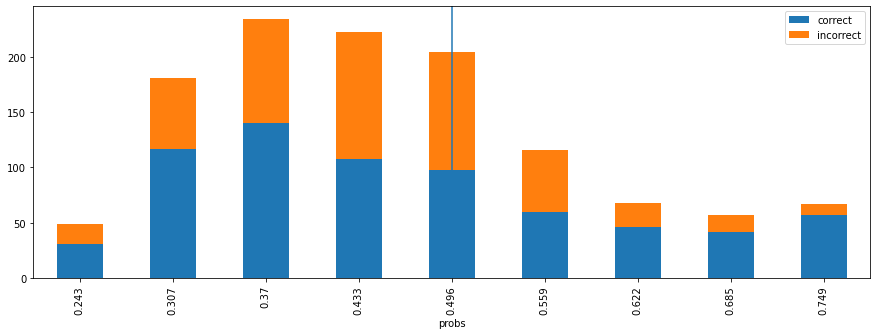

In [ ]:
d = xai.smile_imbalance(
    y_test, 
    probabilities)

<AxesSubplot:>

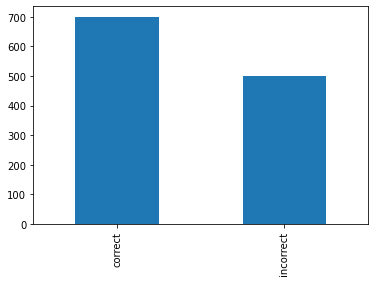

In [ ]:
d[["correct", "incorrect"]].sum().plot.bar()

C:\Users\kawsh\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\kawsh\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\kawsh\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

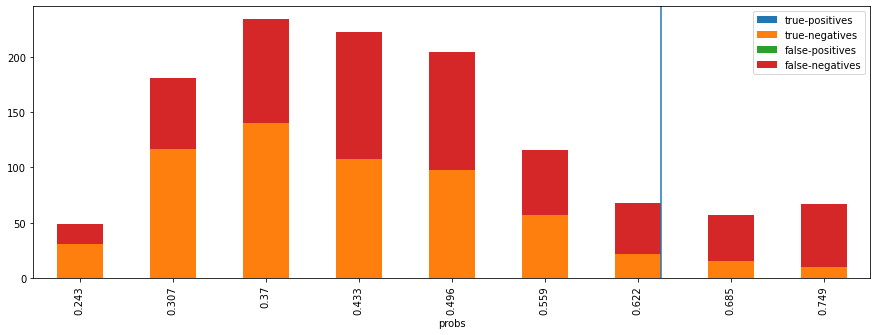

In [ ]:
d = xai.smile_imbalance(
    y_test, 
    probabilities,
    threshold=0.75,
    display_breakdown=True)

<AxesSubplot:>

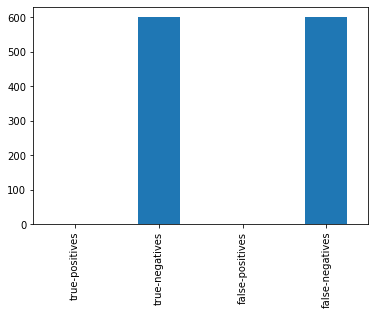

In [ ]:
display_bars = ["true-positives", "true-negatives", 
                "false-positives", "false-negatives"]
d[display_bars].sum().plot.bar()

C:\Users\kawsh\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\kawsh\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\kawsh\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

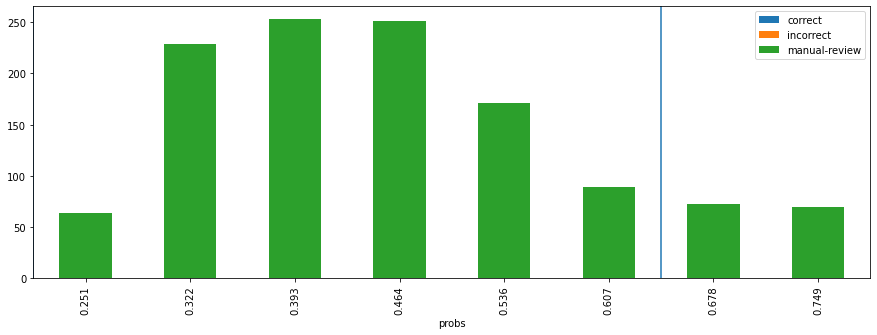

In [ ]:
d = xai.smile_imbalance(
    y_test, 
    probabilities,
    bins=9,
    threshold=0.75,
    manual_review=0.00001,
    display_breakdown=False)

<AxesSubplot:>

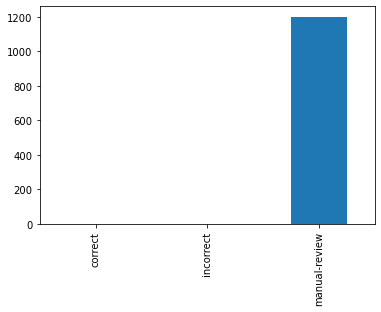

In [ ]:
d[["correct", "incorrect", "manual-review"]].sum().plot.bar()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test
0,0.00275,0.002333,0.002833,0.005417,0.00375,0.000417,0.004,0.0035,0.002333,0.001167,-0.00675,-0.001333,-0.004417,-0.0035,-0.002,-0.000167,0.000083,0.0


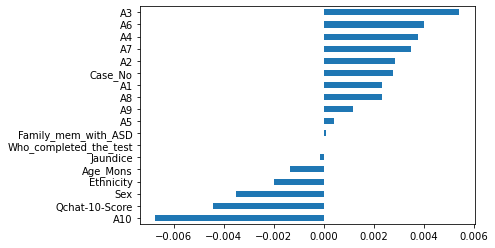

In [ ]:
def get_avg(x, y):
    return model.evaluate(f_in(x), y, verbose=0)[1]

imp = xai.feature_importance(x_test, y_test, get_avg)

imp.head()